In [44]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Replace 'your_data.csv' with the path to your CSV file
data = pd.read_csv('Employee_Attrition.csv')
pd.set_option('display.max_columns', None) 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Text(0, 0.5, 'Count')

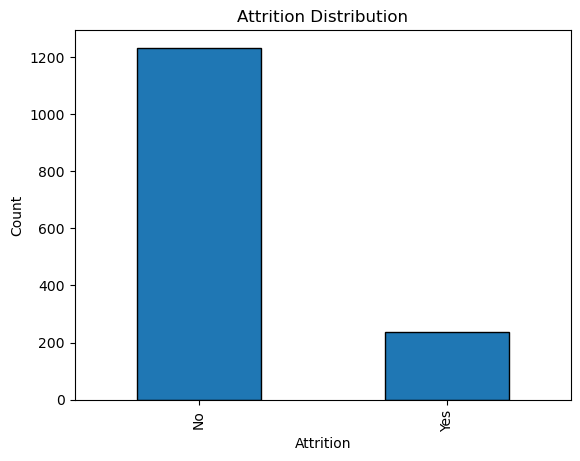

In [45]:
attrition_counts = data['Attrition'].value_counts()

# Plot a bar chart
attrition_counts.plot(kind='bar', edgecolor='black')

# Set chart title and labels
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')

In [46]:
age_att_counts = data.groupby(['Age', 'Attrition']).size().reset_index(name='Counts')
px.line(age_att_counts,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

In [48]:
man_att=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

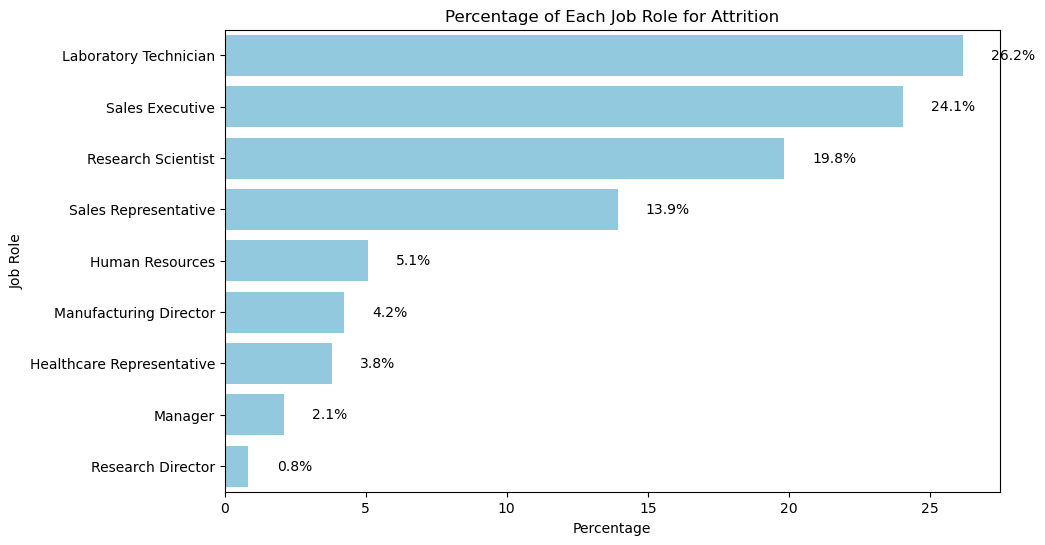

In [55]:
attrition_df = data[data['Attrition'] == 'Yes']

# Calculate the percentage of each job role for attrition
job_role_percentage = (attrition_df['JobRole'].value_counts() / len(attrition_df)) * 100

# Create a horizontal bar plot using seaborn
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=job_role_percentage.values, y=job_role_percentage.index, color='skyblue')

# Annotate each bar with its percentage value
for i, value in enumerate(job_role_percentage.values):
    plot.text(value + 1, i, f'{value:.1f}%', ha='left', va='center', fontsize=10)

plt.title('Percentage of Each Job Role for Attrition')
plt.xlabel('Percentage')
plt.ylabel('Job Role')
plt.show()